In [51]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import lag_plot
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns

In [2]:
df = pd.read_csv('./kaggle/indexProcessed.csv')
df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013
...,...,...,...,...,...,...,...,...,...
104219,J203.JO,2021-05-25,66054.921880,66812.453130,66022.976560,66076.679690,66076.679690,0.0,4625.367578
104220,J203.JO,2021-05-26,66076.679690,66446.367190,66030.351560,66108.226560,66108.226560,0.0,4627.575859
104221,J203.JO,2021-05-27,66108.226560,66940.250000,66102.546880,66940.250000,66940.250000,0.0,4685.817500
104222,J203.JO,2021-05-28,66940.250000,67726.562500,66794.609380,67554.859380,67554.859380,0.0,4728.840157


In [3]:
dfi = df.loc[df['Index'] == 'NSEI']
dfi

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
76554,NSEI,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,44.946499
76555,NSEI,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,45.462002
76556,NSEI,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,47.323501
76557,NSEI,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,47.475498
76558,NSEI,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,48.375498
...,...,...,...,...,...,...,...,...,...
79895,NSEI,2021-05-25,15291.750000,15293.849610,15163.400390,15208.450200,15208.450200,441500.0,152.084502
79896,NSEI,2021-05-26,15257.049810,15319.900390,15194.950200,15301.450200,15301.450200,384000.0,153.014502
79897,NSEI,2021-05-27,15323.950200,15384.549810,15272.500000,15337.849610,15337.849610,0.0,153.378496
79898,NSEI,2021-05-28,15421.200200,15469.650390,15394.750000,15435.650390,15435.650390,468100.0,154.356504


In [4]:
dfi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3346 entries, 76554 to 79899
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      3346 non-null   object 
 1   Date       3346 non-null   object 
 2   Open       3346 non-null   float64
 3   High       3346 non-null   float64
 4   Low        3346 non-null   float64
 5   Close      3346 non-null   float64
 6   Adj Close  3346 non-null   float64
 7   Volume     3346 non-null   float64
 8   CloseUSD   3346 non-null   float64
dtypes: float64(7), object(2)
memory usage: 261.4+ KB


In [5]:
list_columns = (dfi.columns).tolist()
print(list_columns)

['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'CloseUSD']


In [6]:
dfi.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,3346.000000,3346.000000,3346.000000,3346.000000,3346.000000,3.346000e+03,3346.000000
mean,7665.751273,7712.532773,7605.887145,7660.047238,7660.047238,1.830719e+05,76.600472
std,2838.223515,2840.775215,2826.888406,2834.111753,2834.111753,2.243330e+05,28.341118
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00,25.242000
25%,5328.274902,5375.937622,5288.324951,5326.037598,5326.037598,0.000000e+00,53.260376
50%,7485.625000,7536.824951,7426.549805,7485.324951,7485.324951,1.453000e+05,74.853250
75%,10071.537110,10121.674805,10019.499757,10074.424805,10074.424805,2.393750e+05,100.744248
max,15437.750000,15606.349610,15394.750000,15582.799810,15582.799810,1.811000e+06,155.827998


In [7]:
dfi.isnull().sum()

Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
CloseUSD     0
dtype: int64

In [8]:
dfi.duplicated().any()

False

In [11]:
dfi['Date'] = pd.to_datetime(dfi['Date'])
dfi

C:\Users\hp\AppData\Local\Temp\ipykernel_3636\4207591281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi['Date'] = pd.to_datetime(dfi['Date'])


,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
76554,NSEI,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0,44.946499
76555,NSEI,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0,45.462002
76556,NSEI,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0,47.323501
76557,NSEI,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0,47.475498
76558,NSEI,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0,48.375498
...,...,...,...,...,...,...,...,...,...
79895,NSEI,2021-05-25,15291.750000,15293.849610,15163.400390,15208.450200,15208.450200,441500.0,152.084502
79896,NSEI,2021-05-26,15257.049810,15319.900390,15194.950200,15301.450200,15301.450200,384000.0,153.014502
79897,NSEI,2021-05-27,15323.950200,15384.549810,15272.500000,15337.849610,15337.849610,0.0,153.378496
79898,NSEI,2021-05-28,15421.200200,15469.650390,15394.750000,15435.650390,15435.650390,468100.0,154.356504


In [17]:
dfi['Date'].min(), dfi['Date'].max()

(Timestamp('2007-09-17 00:00:00'), Timestamp('2021-05-31 00:00:00'))

In [12]:
dfi1 = dfi[['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD']]


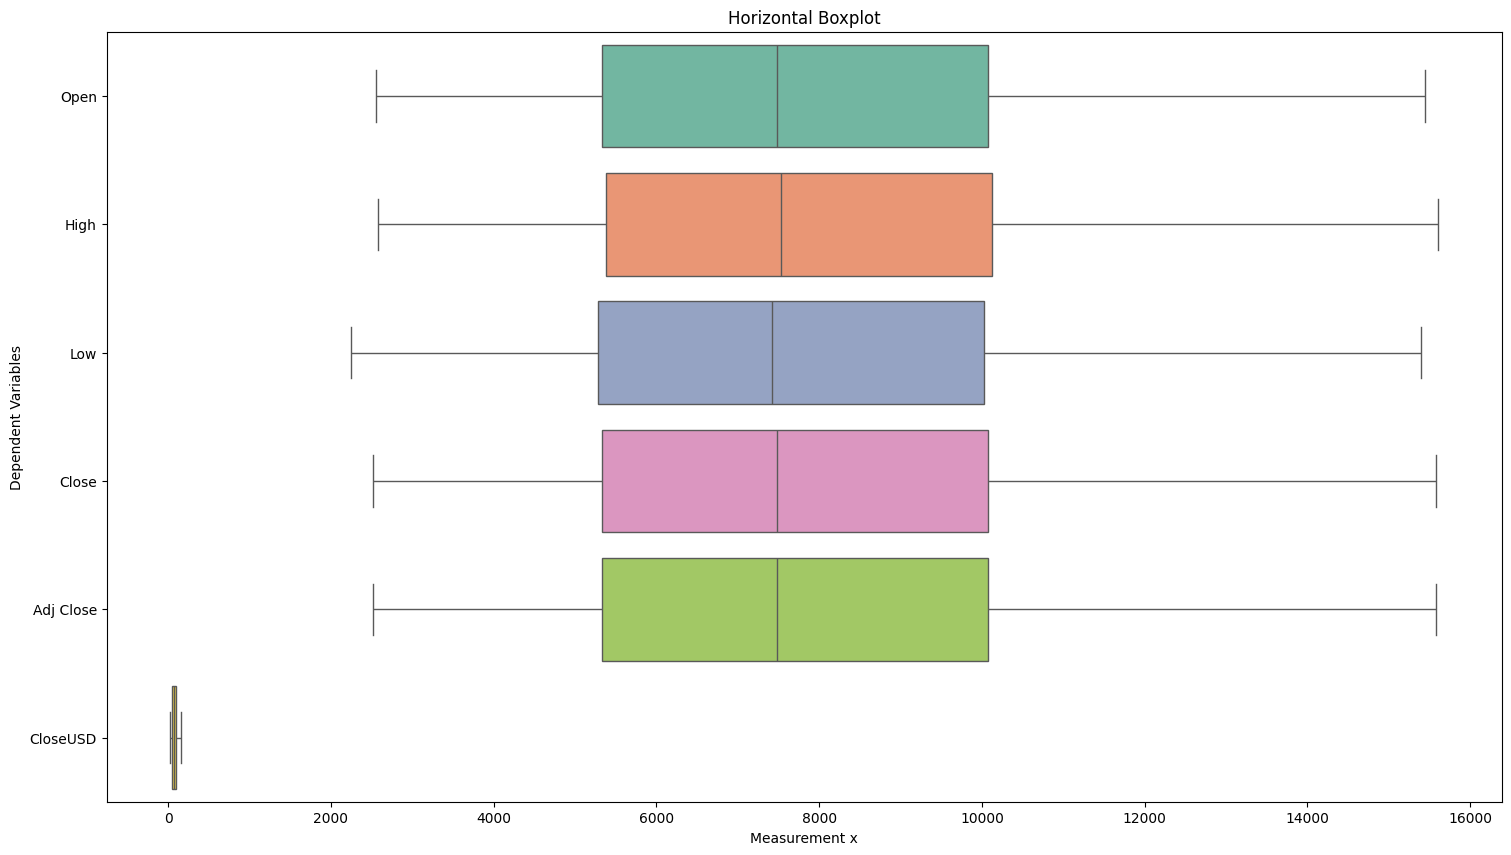

In [13]:

fig, ax = plt.subplots(figsize=(18, 10))
plt.title(f"Horizontal Boxplot")
        
plt.ylabel('Dependent Variables')
plt.xlabel('Measurement x')
ax = sns.boxplot(data = dfi1,
                orient = 'h', 
                palette = 'Set2',
                notch = False) 
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_3636\3264520508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data = dfi['Volume'],


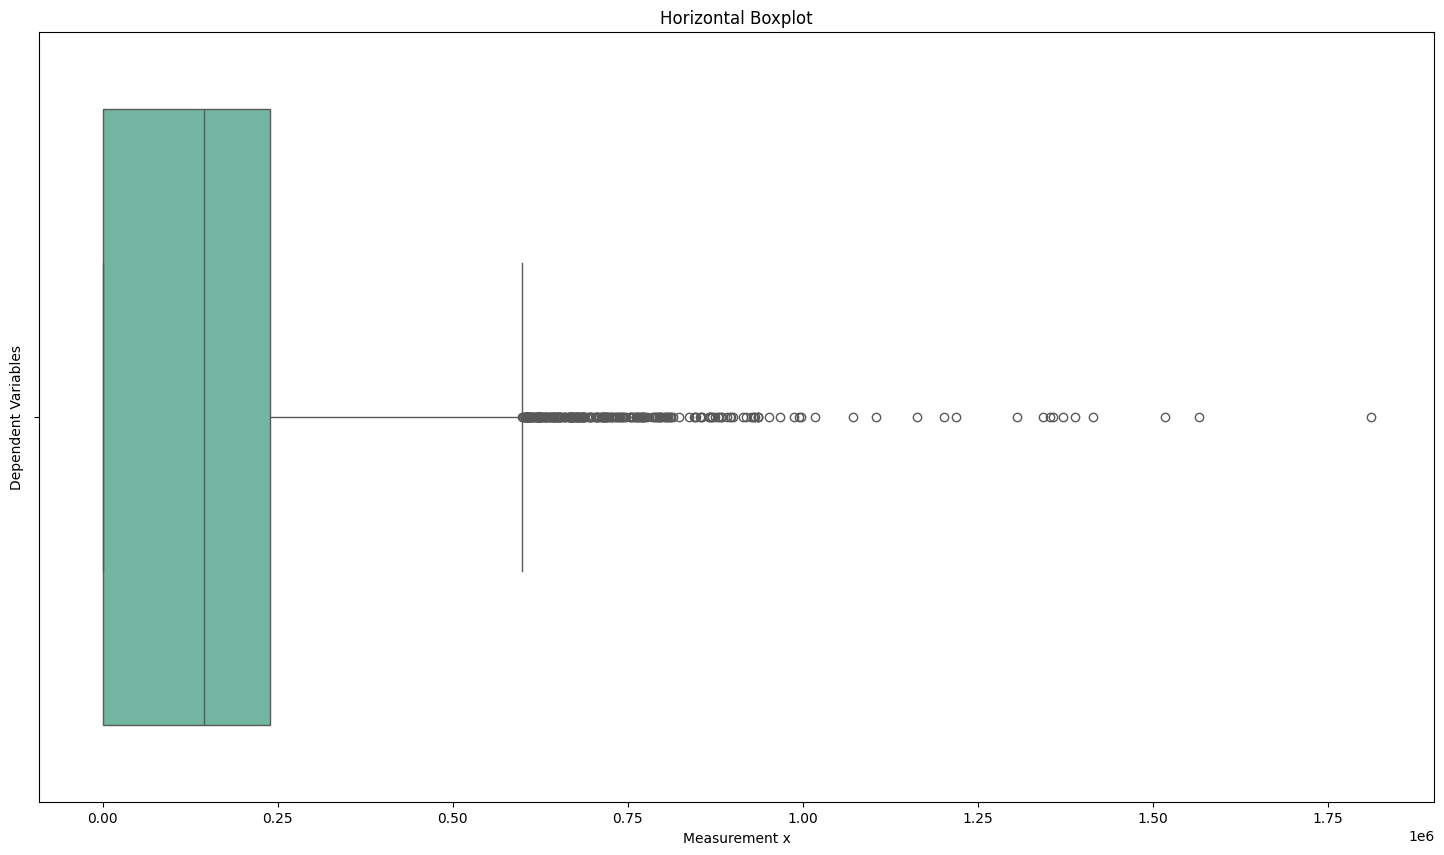

In [14]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.title(f"Horizontal Boxplot")
        
plt.ylabel('Dependent Variables')
plt.xlabel('Measurement x')
ax = sns.boxplot(data = dfi['Volume'],
                orient = 'h', 
                palette = 'Set2',
                notch = False) 
plt.show()

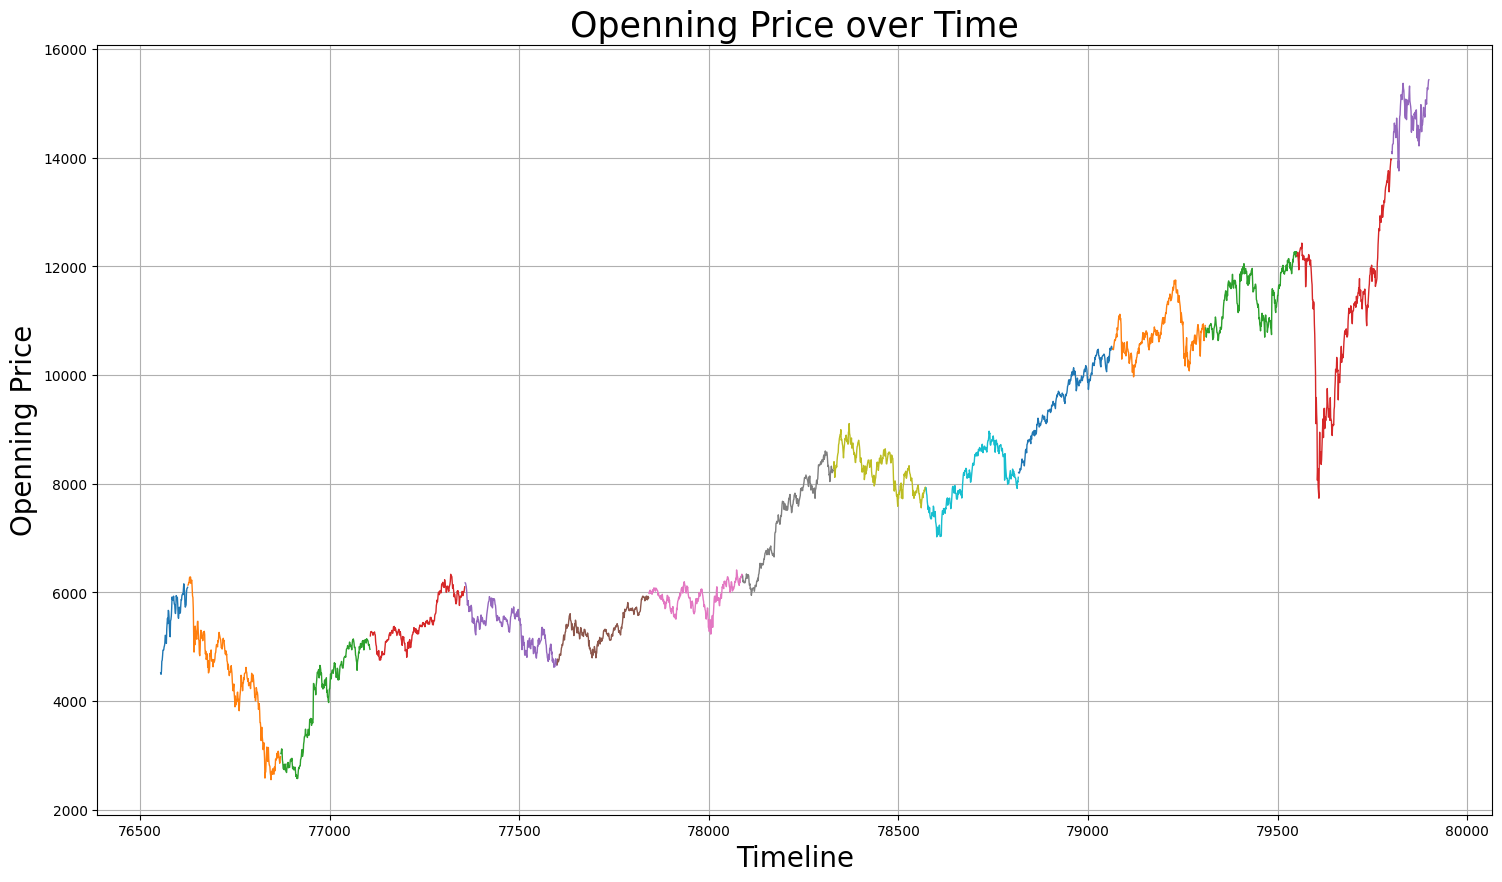

In [21]:
img_vale3_distr_line = dfi.groupby(dfi["Date"].dt.year)['Open'].plot(linewidth=1,figsize=(18, 10))

plt.title('Openning Price over Time', fontsize=25)
plt.xlabel("Timeline", fontsize=20)
plt.ylabel("Openning Price", fontsize=20)
plt.grid(True)

In [ ]:
decomposition_add = seasonal_decompose(dfi['Open'],period=13,model='additive') 
trend = decomposition_add.trend 
seasonal = decomposition_add.seasonal 
residual = decomposition_add.resid 

<Axes: xlabel='Time (days)', ylabel='Residue'>

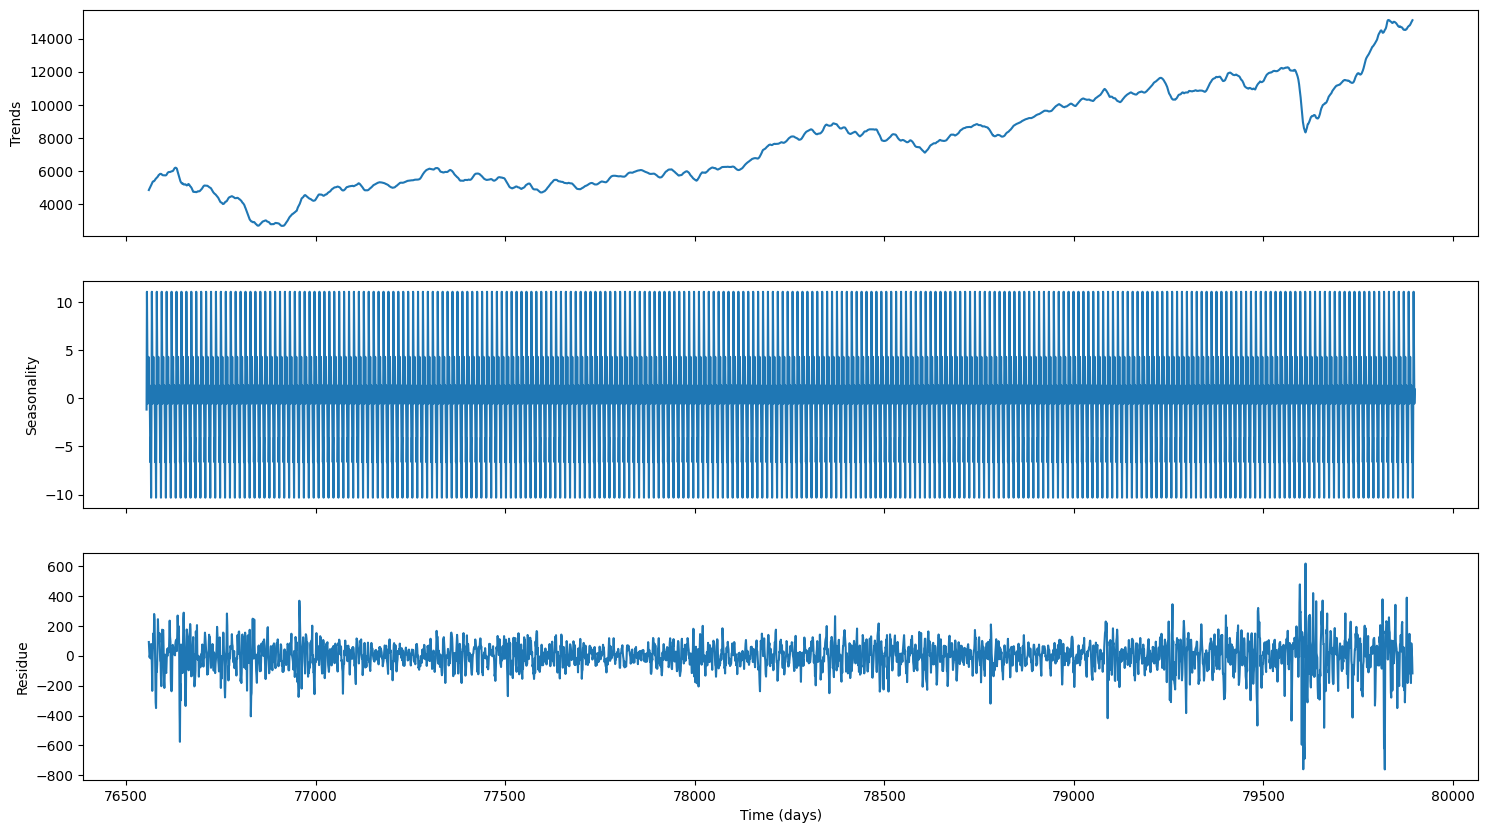

In [ ]:
fig, axes = plt.subplots(ncols=1, nrows=3, sharex=True,figsize=(18, 10))

axes[0].set_ylabel('Trends')
axes[1].set_ylabel('Seasonality')
axes[2].set_ylabel('Residue')
axes[2].set_xlabel('Time (days)')

decomposition_add.trend.plot(ax=axes[0])
decomposition_add.seasonal.plot(ax=axes[1])
decomposition_add.resid.plot(ax=axes[2])

In [ ]:
#date is messed up in all these plots .. correct that later

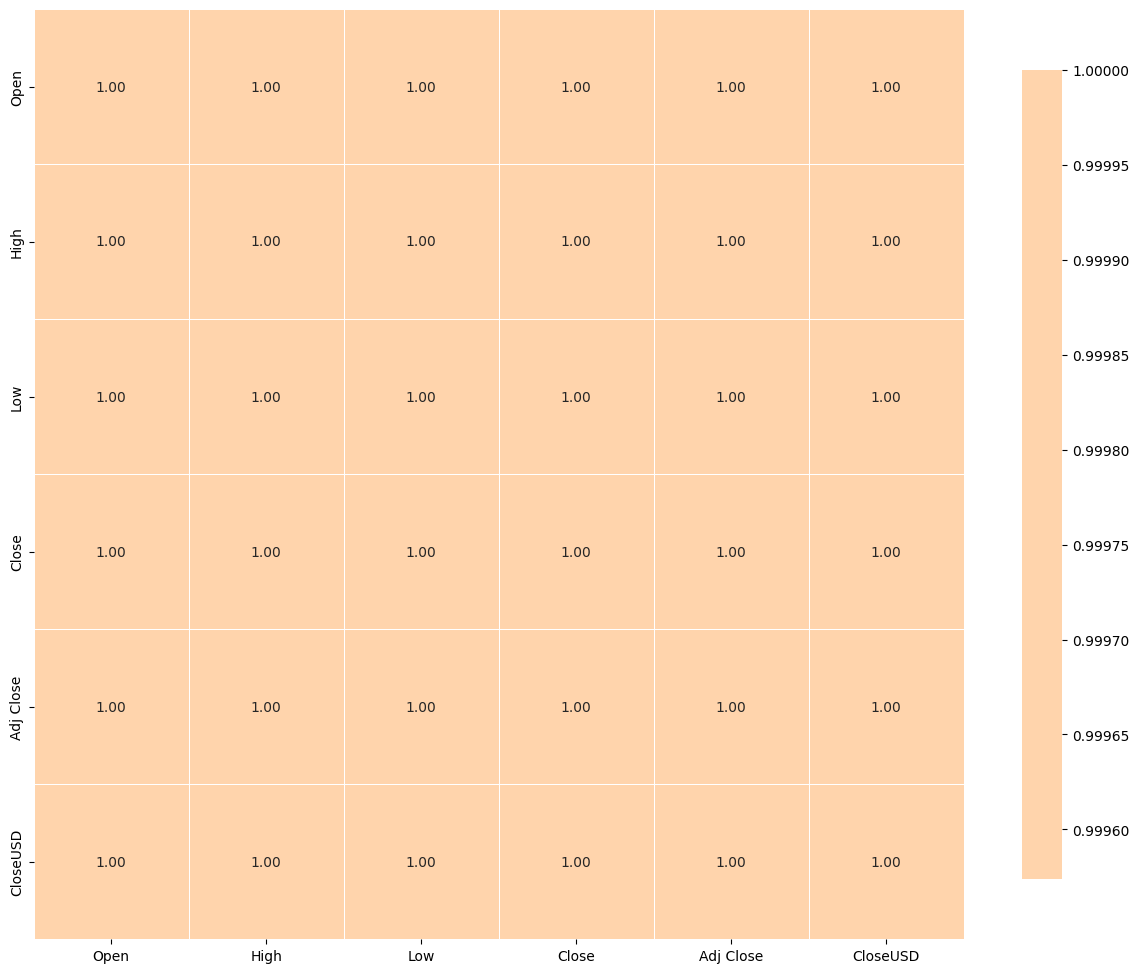

In [ ]:
correlations = dfi[['Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD']].corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [ ]:
dfi['Open'].autocorr(lag=1)

0.9994020316868742

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

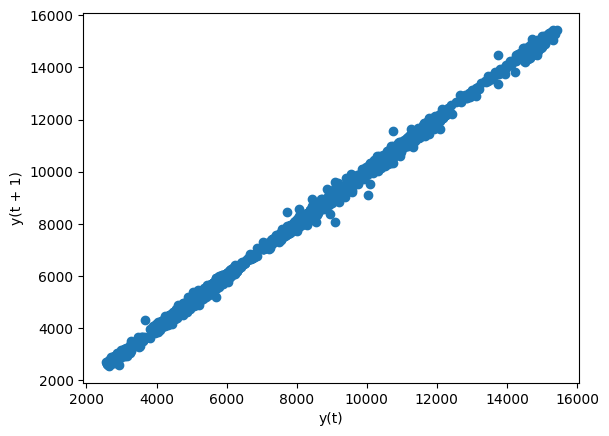

In [25]:
lag_plot(dfi['Open'],lag=1)

In [34]:
x_train = dfi.loc[dfi['Date'] < '2019-01-01 00:00:00'] # we only use the data upto 2019  as the training data
y_train = x_train['Open'] # we the Open column to further simplfy and break the anallysis into smaller steps
x_test = dfi.loc[dfi['Date'] > '2019-01-01 00:00:00']
y_test = x_test['Open']
x_test.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
79310,NSEI,2019-01-02,10868.84961,10895.34961,10735.04981,10792.50000,10792.50000,309700.0,107.925000
79311,NSEI,2019-01-03,10796.79981,10814.04981,10661.25000,10672.25000,10672.25000,286200.0,106.722500
79312,NSEI,2019-01-04,10699.70020,10741.04981,10628.65039,10727.34961,10727.34961,296600.0,107.273496
79313,NSEI,2019-01-07,10804.84961,10835.95020,10750.15039,10771.79981,10771.79981,269400.0,107.717998
79314,NSEI,2019-01-08,10786.25000,10818.45020,10733.25000,10802.15039,10802.15039,277700.0,108.021504


In [75]:
train_norm = x_train[['Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD']]
train_norm_arr = np.asarray(train_norm)
#train_norm = np.reshape(train_norm_arr, (-1, 1))
scaler = MinMaxScaler()
#scaler = scaler.fit(train_norm)
train_norm = scaler.fit_transform(train_norm)
for i in range(5):
    print(train_norm[i])

[0.21361246 0.214035   0.23579605 0.21384695 0.21384695 0.21384695]
[0.2109652  0.21433473 0.23565857 0.21944155 0.21944155 0.21944155]
[0.21706964 0.23473824 0.24292247 0.23964383 0.23964383 0.23964383]
[0.2371388  0.23711975 0.2609923  0.24129341 0.24129341 0.24129341]
[0.23910658 0.24745775 0.26231928 0.25106083 0.25106083 0.25106083]


In [76]:
test_norm = x_test[['Open', 'High', 'Low', 'Close', 'Adj Close', 'CloseUSD']]
test_norm_arr = np.asarray(test_norm)
#test_norm = np.reshape(test_norm_arr, (-1, 1))
scaler = MinMaxScaler()
#scaler = scaler.fit(test_norm)
test_norm = scaler.fit_transform(test_norm)
for i in range(5):
    print(test_norm[i])

[0.40683661 0.37762566 0.40894126 0.39915085 0.39915085 0.39915085]
[0.39748265 0.36688507 0.39958014 0.38406784 0.38406784 0.38406784]
[0.38487657 0.35724097 0.39544505 0.39097901 0.39097901 0.39097901]
[0.39852773 0.36977835 0.41085669 0.39655441 0.39655441 0.39655441]
[0.39611301 0.36746641 0.40871296 0.4003613  0.4003613  0.4003613 ]


In [77]:
print(len(train_norm))
print(len(test_norm))
print(train_norm.shape)
print(test_norm.shape)

2756
590
(2756, 6)
(590, 6)


In [78]:
n_future = 1
n_past = 13
trainX = []
trainY = []
for i in range(n_past, len(train_norm) - n_future + 1):
    trainX.append(train_norm[i-n_past:i,0:train_norm.shape[1]])
    trainY.append(train_norm[i-n_future - 1 :i + n_future,0])

trainX , trainY = np.array(trainX), np.array(trainY)

In [79]:
print(trainX.shape)
print(trainY.shape)

(2743, 13, 6)
(2743, 3)


In [99]:
model_lstm = Sequential(name='lstm')
model_lstm.add(LSTM(units=len(x_train.columns),
                    return_sequences=True,
                    input_shape=(trainX.shape[1], trainX.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=10, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=10, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(units=10))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(units=1))
model_lstm.compile(loss='mean_squared_error',
                   optimizer='adam',
                   metrics=['mse', 'mape'])

In [100]:
model_lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 13, 9)             576       
                                                                 
 dropout_9 (Dropout)         (None, 13, 9)             0         
                                                                 
 lstm_11 (LSTM)              (None, 13, 10)            800       
                                                                 
 dropout_10 (Dropout)        (None, 13, 10)            0         
                                                                 
 lstm_12 (LSTM)              (None, 13, 10)            840       
                                                                 
 dropout_11 (Dropout)        (None, 13, 10)            0         
                                                                 
 lstm_13 (LSTM)              (None, 10)                840    

In [101]:
%%time


history = model_lstm.fit(trainX,
                         trainY,
                         epochs=33,
                         shuffle=False,
                         validation_split=0.30,
                         verbose=0)
history

CPU times: total: 1min 1s
Wall time: 31 s


In [83]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'mape', 'val_loss', 'val_mse', 'val_mape'])


In [102]:
best_epochs = history.history["loss"].index(min(history.history["loss"]))
best_epochs

32

In [103]:
min(history.history["loss"])

0.0019458014285191894

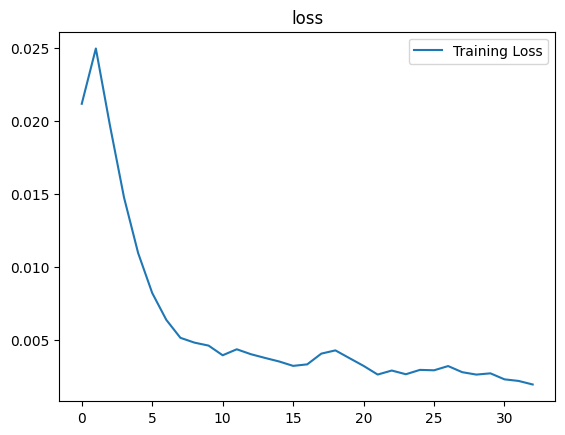

In [104]:
plt.plot(history.history["loss"], label="Training Loss")
plt.title('loss')
plt.legend()
plt.show()

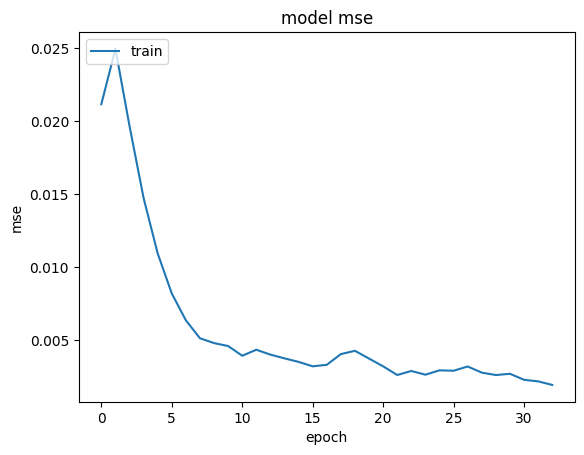

In [105]:
plt.plot(history.history['mse'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [106]:
n_future = 1
n_past = 13
testX = []
testY = []
for i in range(n_past, len(test_norm) - n_future + 1):
    testX.append(test_norm[i-n_past:i,0:test_norm.shape[1]])
    testY.append(test_norm[i-n_future - 1 :i + n_future,0])

testX , testY = np.array(testX), np.array(testY)

In [110]:
print(testX.shape)
print(testY.shape)

(577, 13, 6)
(577, 3)


In [111]:
y_pred = model_lstm.predict(testX)

 1/19 [>.............................] - ETA: 0s

19/19 [==============================] - 0s 4ms/step


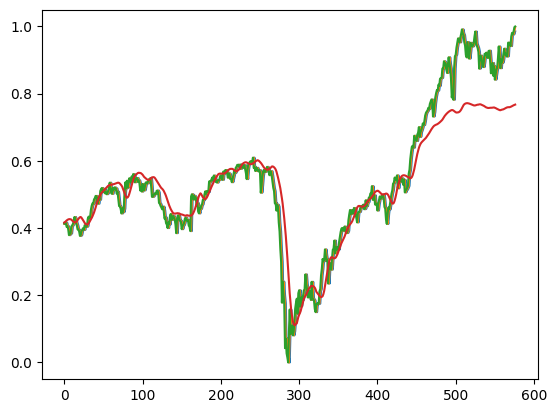

In [118]:
plt.plot(testY)
plt.plot(y_pred)
plt.show()